<a href="https://colab.research.google.com/github/jays-github2022/Activity_3/blob/main/Activity_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url)

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.head(10)  # To display the first 10 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [27]:
# Convert 'Survived' to integer
titanic_df['Survived'] = titanic_df['Survived'].astype(int)

# Convert 'Pclass' to integer
titanic_df['Pclass'] = titanic_df['Pclass'].astype(int)

# Convert 'Age' to float
titanic_df['Age'] = titanic_df['Age'].astype(float)

# Convert 'SibSp' to integer
titanic_df['SibSp'] = titanic_df['SibSp'].astype(int)

# Convert 'Parch' to integer
titanic_df['Parch'] = titanic_df['Parch'].astype(int)

# Convert 'Fare' to float
titanic_df['Fare'] = titanic_df['Fare'].astype(float)

In [ ]:
# Fill missing values in 'Age' with the median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Fill missing values in 'Fare' with the median
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)

In [11]:
# Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# Create a new feature 'IsAlone' based on 'FamilySize'
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1

# Create a new feature 'Title' by extracting the title from the 'Name' column
titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group less frequent titles into a single category 'Rare'
rare_titles = ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
titanic_df['Title'] = titanic_df['Title'].replace(rare_titles, 'Rare')

# Replace other titles with more common ones
titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

# Create a new feature 'AgeBand' by binning the 'Age' column
titanic_df['AgeBand'] = pd.cut(titanic_df['Age'], 5)

# Create a new feature 'FareBand' by binning the 'Fare' column
titanic_df['FareBand'] = pd.qcut(titanic_df['Fare'], 4)

In [12]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Select numerical features for polynomial transformation
numerical_features = ['Age', 'Fare', 'FamilySize']
X = titanic_df[numerical_features]

# Create a PolynomialFeatures object with degree 2
poly = PolynomialFeatures(degree=2)

# Transform the selected features
X_poly = poly.fit_transform(X)

# Create a new DataFrame with the polynomial features
poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(numerical_features))

# Concatenate the polynomial features with the original DataFrame
titanic_df = pd.concat([titanic_df, poly_df], axis=1)

In [13]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,1,Age,Fare,FamilySize,Age^2,Age Fare,Age FamilySize,Fare^2,Fare FamilySize,FamilySize^2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,...,1.0,22.000000,7.2500,2.0,484.000000,159.500000,44.000000,52.562500,14.5000,4.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,...,1.0,38.000000,71.2833,2.0,1444.000000,2708.765400,76.000000,5081.308859,142.5666,4.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,...,1.0,26.000000,7.9250,1.0,676.000000,206.050000,26.000000,62.805625,7.9250,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,...,1.0,35.000000,53.1000,2.0,1225.000000,1858.500000,70.000000,2819.610000,106.2000,4.0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,...,1.0,35.000000,8.0500,1.0,1225.000000,281.750000,35.000000,64.802500,8.0500,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,...,1.0,27.000000,13.0000,1.0,729.000000,351.000000,27.000000,169.000000,13.0000,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,...,1.0,19.000000,30.0000,1.0,361.000000,570.000000,19.000000,900.000000,30.0000,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,...,1.0,29.699118,23.4500,4.0,882.037589,696.444309,118.796471,549.902500,93.8000,16.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,...,1.0,26.000000,30.0000,1.0,676.000000,780.000000,26.000000,900.000000,30.0000,1.0


In [14]:
survival_rate = titanic_df['Survived'].mean()
print(f"Overall Survival Rate: {survival_rate:.2f}")

Overall Survival Rate: 0.38


In [15]:
survival_rate_by_gender = titanic_df.groupby('Sex')['Survived'].mean()
print(survival_rate_by_gender)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [16]:
survival_rate_by_pclass = titanic_df.groupby('Pclass')['Survived'].mean()
print(survival_rate_by_pclass)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [21]:
print(titanic_df.dtypes)

PassengerId           int64
Survived              int64
Pclass                int64
Name                 object
Sex                  object
Age                 float64
SibSp                 int64
Parch                 int64
Ticket               object
Fare                float64
Cabin                object
Embarked             object
FamilySize            int64
IsAlone               int64
Title                object
AgeBand            category
FareBand           category
1                   float64
Age                 float64
Fare                float64
FamilySize          float64
Age^2               float64
Age Fare            float64
Age FamilySize      float64
Fare^2              float64
Fare FamilySize     float64
FamilySize^2        float64
dtype: object


In [30]:
titanic_df['Cabin'].fillna('Unknown', inplace=True)

In [32]:
# Check for missing values in each column
missing_values = titanic_df.isnull().sum()

# Print the results
print(missing_values)

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           0
FamilySize         0
IsAlone            0
Title              0
AgeBand            0
FareBand           0
1                  0
Age                0
Fare               0
FamilySize         0
Age^2              0
Age Fare           0
Age FamilySize     0
Fare^2             0
Fare FamilySize    0
FamilySize^2       0
dtype: int64


In [33]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,1,Age,Fare,FamilySize,Age^2,Age Fare,Age FamilySize,Fare^2,Fare FamilySize,FamilySize^2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,...,1.0,22.000000,7.2500,2.0,484.000000,159.500000,44.000000,52.562500,14.5000,4.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,...,1.0,38.000000,71.2833,2.0,1444.000000,2708.765400,76.000000,5081.308859,142.5666,4.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,...,1.0,26.000000,7.9250,1.0,676.000000,206.050000,26.000000,62.805625,7.9250,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,...,1.0,35.000000,53.1000,2.0,1225.000000,1858.500000,70.000000,2819.610000,106.2000,4.0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,...,1.0,35.000000,8.0500,1.0,1225.000000,281.750000,35.000000,64.802500,8.0500,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,...,1.0,27.000000,13.0000,1.0,729.000000,351.000000,27.000000,169.000000,13.0000,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,...,1.0,19.000000,30.0000,1.0,361.000000,570.000000,19.000000,900.000000,30.0000,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,...,1.0,29.699118,23.4500,4.0,882.037589,696.444309,118.796471,549.902500,93.8000,16.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,...,1.0,26.000000,30.0000,1.0,676.000000,780.000000,26.000000,900.000000,30.0000,1.0


In [ ]:
!pip install matplotlib seaborn==0.12.2

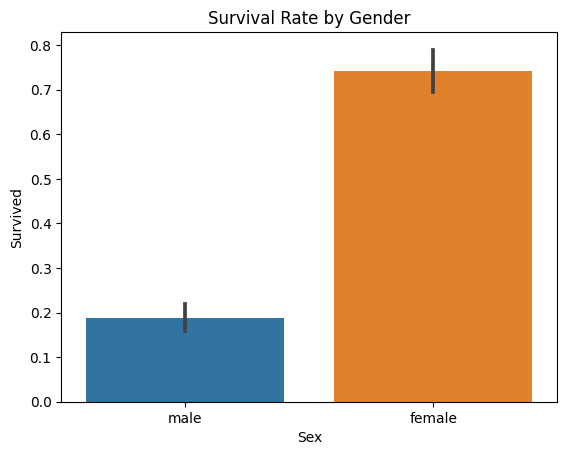

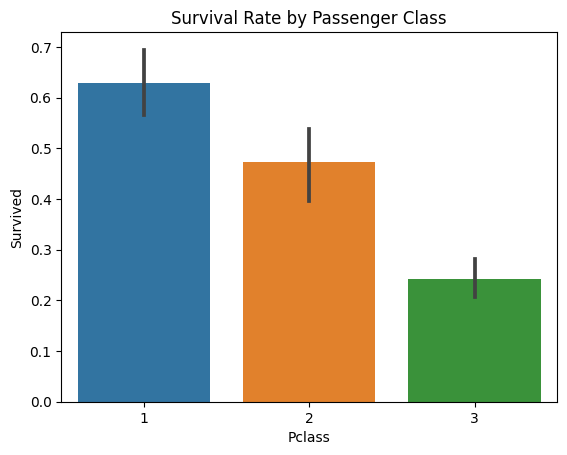

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


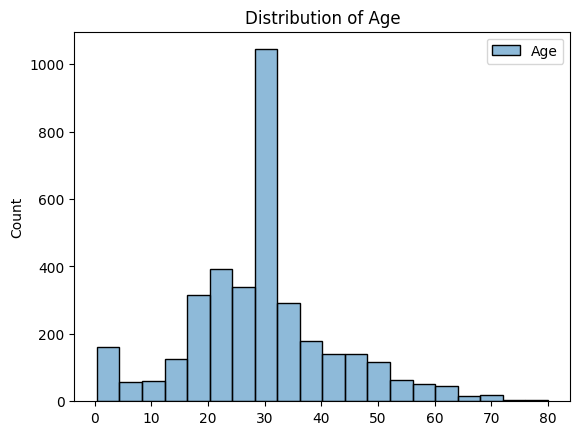

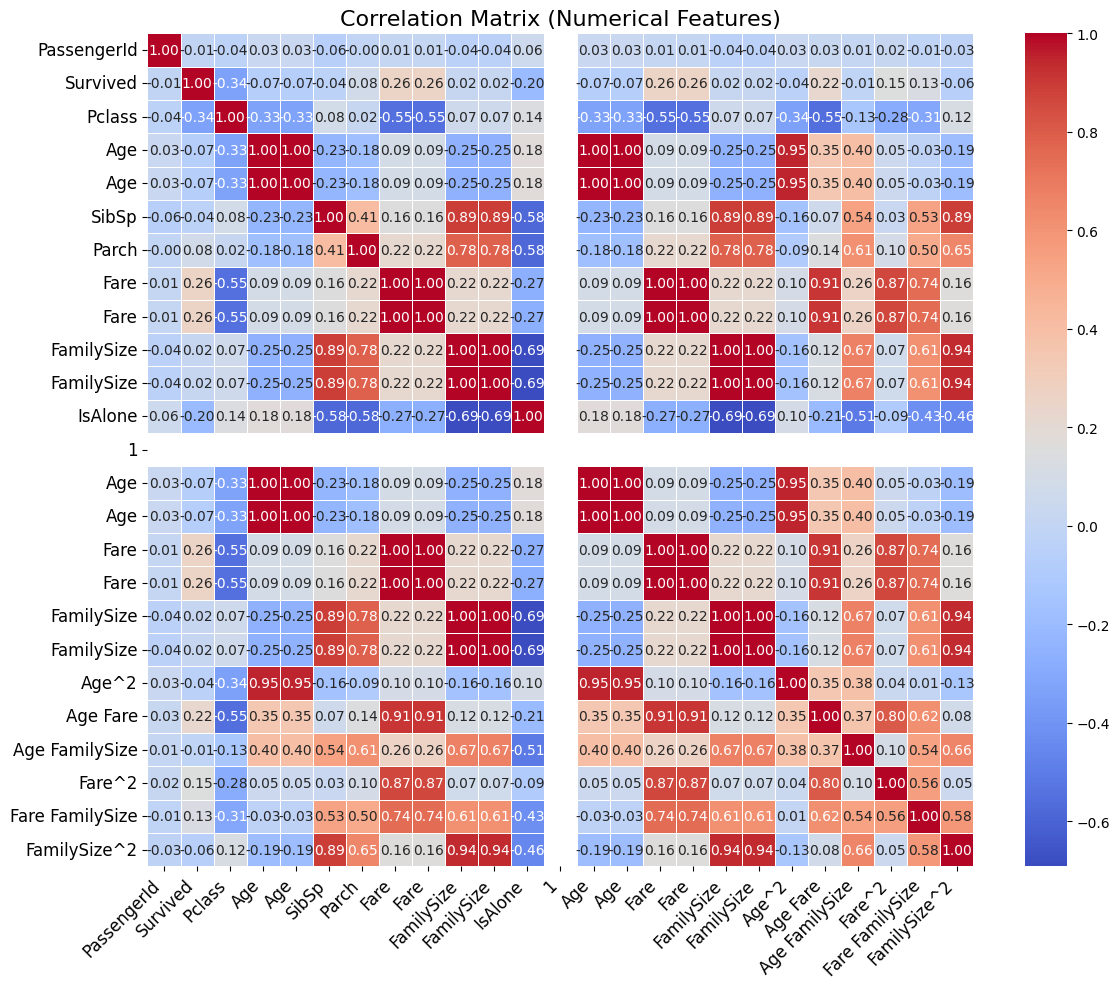

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Survival Rate by Gender
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.show()

# Survival Rate by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Distribution of Age
sns.histplot(titanic_df['Age'], bins=20)
plt.title('Distribution of Age')
plt.show()

# Select numerical features for correlation matrix
numerical_features = titanic_df.select_dtypes(include=['number']).columns

# Calculate correlation matrix for numerical features
correlation_matrix = titanic_df[numerical_features].corr()

# Create heatmap with improved clarity
plt.figure(figsize=(12, 10))  # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (Numerical Features)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()